In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

638

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f8958b145ec2a8884b7f22d60e4aa843


In [17]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vanimo
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | victoria
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | sorong
Processing Record 8 of Set 1 | esna
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | luwuk
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | san quintin
Processing Record 14 of Set 1 | hay river
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | kedrovyy
Processing Record 20 of Set 1 | quimper
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 

Processing Record 34 of Set 4 | xining
Processing Record 35 of Set 4 | mahebourg
Processing Record 36 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 37 of Set 4 | severo-kurilsk
Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | ikalamavony
Processing Record 42 of Set 4 | aykhal
Processing Record 43 of Set 4 | bud
Processing Record 44 of Set 4 | manono
Processing Record 45 of Set 4 | porto velho
Processing Record 46 of Set 4 | turukhansk
Processing Record 47 of Set 4 | kirakira
Processing Record 48 of Set 4 | hobart
Processing Record 49 of Set 4 | beyneu
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | olavarria
Processing Record 3 of Set 5 | altamira
Processing Record 4 of Set 5 | camabatela
Processing Record 5 of 

Processing Record 27 of Set 8 | jiaojiang
Processing Record 28 of Set 8 | shadrinsk
Processing Record 29 of Set 8 | aksarka
Processing Record 30 of Set 8 | dwarka
Processing Record 31 of Set 8 | kungurtug
Processing Record 32 of Set 8 | watsa
Processing Record 33 of Set 8 | williams lake
Processing Record 34 of Set 8 | curup
Processing Record 35 of Set 8 | victoria point
Processing Record 36 of Set 8 | arandis
Processing Record 37 of Set 8 | mpanda
Processing Record 38 of Set 8 | thap than
Processing Record 39 of Set 8 | tripoli
Processing Record 40 of Set 8 | casa nova
Processing Record 41 of Set 8 | cheremushskiy
Processing Record 42 of Set 8 | lazurne
Processing Record 43 of Set 8 | vila velha
Processing Record 44 of Set 8 | narathiwat
Processing Record 45 of Set 8 | ishigaki
Processing Record 46 of Set 8 | beringovskiy
Processing Record 47 of Set 8 | the valley
Processing Record 48 of Set 8 | benoy
Processing Record 49 of Set 8 | tubuala
Processing Record 50 of Set 8 | santiago
Pro

Processing Record 14 of Set 12 | gulbarga
Processing Record 15 of Set 12 | bengkulu
Processing Record 16 of Set 12 | cobija
Processing Record 17 of Set 12 | barbar
City not found. Skipping...
Processing Record 18 of Set 12 | nipawin
Processing Record 19 of Set 12 | veydelevka
Processing Record 20 of Set 12 | henties bay
Processing Record 21 of Set 12 | rahuri
Processing Record 22 of Set 12 | liminangcong
City not found. Skipping...
Processing Record 23 of Set 12 | labuhan
Processing Record 24 of Set 12 | varzea alegre
Processing Record 25 of Set 12 | narsaq
Processing Record 26 of Set 12 | erenhot
Processing Record 27 of Set 12 | ampanihy
Processing Record 28 of Set 12 | talcahuano
Processing Record 29 of Set 12 | loiza
Processing Record 30 of Set 12 | sambava
Processing Record 31 of Set 12 | bolshaya irba
City not found. Skipping...
Processing Record 32 of Set 12 | pudozh
Processing Record 33 of Set 12 | nouakchott
Processing Record 34 of Set 12 | jacareacanga
Processing Record 35 of 

In [19]:
len(city_data)

584

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vanimo,-2.6741,141.3028,80.17,85,100,3.11,PG,2022-02-07 00:07:26
1,Lebu,-37.6167,-73.6500,60.48,88,0,13.73,CL,2022-02-07 00:07:26
2,Albany,42.6001,-73.9662,21.45,75,62,1.01,US,2022-02-07 00:04:08
3,Bredasdorp,-34.5322,20.0403,61.29,91,2,5.73,ZA,2022-02-07 00:05:54
4,Victoria,22.2855,114.1577,61.18,89,100,1.01,HK,2022-02-07 00:02:27
5,Ushuaia,-54.8000,-68.3000,56.91,90,100,7.34,AR,2022-02-07 00:05:47
6,Sorong,-0.8833,131.2500,80.94,80,99,8.59,ID,2022-02-07 00:07:27
7,Esna,25.2934,32.5540,54.84,43,0,7.90,EG,2022-02-07 00:03:06
8,New Norfolk,-42.7826,147.0587,74.66,38,1,3.00,AU,2022-02-07 00:03:53
9,Punta Arenas,-53.1500,-70.9167,53.71,82,75,9.22,CL,2022-02-07 00:05:47


In [21]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [22]:
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vanimo,PG,2022-02-07 00:07:26,-2.6741,141.3028,80.17,85,100,3.11
1,Lebu,CL,2022-02-07 00:07:26,-37.6167,-73.6500,60.48,88,0,13.73
2,Albany,US,2022-02-07 00:04:08,42.6001,-73.9662,21.45,75,62,1.01
3,Bredasdorp,ZA,2022-02-07 00:05:54,-34.5322,20.0403,61.29,91,2,5.73
4,Victoria,HK,2022-02-07 00:02:27,22.2855,114.1577,61.18,89,100,1.01
...,...,...,...,...,...,...,...,...,...
579,Carballo,ES,2022-02-07 00:23:12,43.2130,-8.6910,49.87,93,56,1.95
580,Arlit,NE,2022-02-07 00:23:12,18.7369,7.3853,63.73,10,0,8.99
581,Turan,VN,2022-02-07 00:23:12,16.0678,108.2208,69.78,94,75,1.14
582,Peleduy,RU,2022-02-07 00:23:13,59.6289,112.7406,3.36,99,100,2.42


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

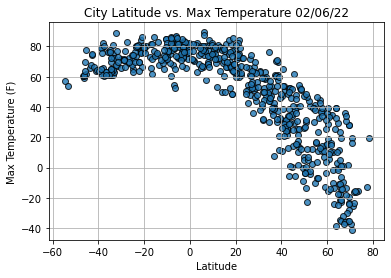

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

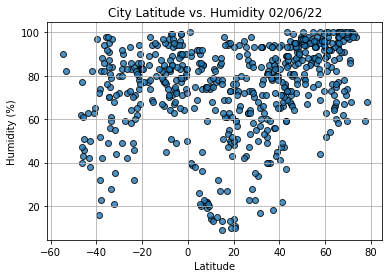

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

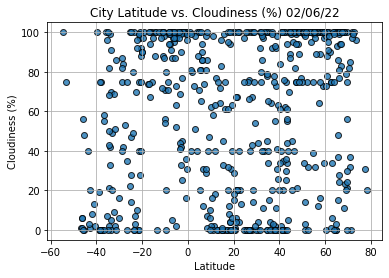

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

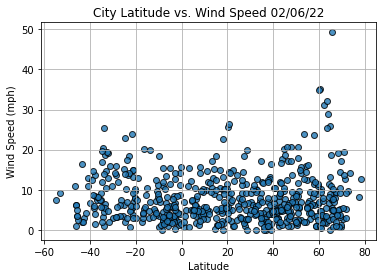

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                    Hay River
Country                        CA
Date          2022-02-07 00:04:08
Lat                       60.8156
Lng                     -115.7999
Max Temp                    34.43
Humidity                       82
Cloudiness                     88
Wind Speed                  10.29
Name: 13, dtype: object

In [32]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
579     True
580     True
581     True
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2022-02-07 00:04:08,42.6001,-73.9662,21.45,75,62,1.01
4,Victoria,HK,2022-02-07 00:02:27,22.2855,114.1577,61.18,89,100,1.01
7,Esna,EG,2022-02-07 00:03:06,25.2934,32.5540,54.84,43,0,7.90
11,Lompoc,US,2022-02-07 00:02:59,34.6391,-120.4579,76.08,55,0,9.22
12,San Quintin,MX,2022-02-07 00:06:13,30.4833,-115.9500,63.95,34,0,7.00
...,...,...,...,...,...,...,...,...,...
579,Carballo,ES,2022-02-07 00:23:12,43.2130,-8.6910,49.87,93,56,1.95
580,Arlit,NE,2022-02-07 00:23:12,18.7369,7.3853,63.73,10,0,8.99
581,Turan,VN,2022-02-07 00:23:12,16.0678,108.2208,69.78,94,75,1.14
582,Peleduy,RU,2022-02-07 00:23:13,59.6289,112.7406,3.36,99,100,2.42


In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2022-02-07 00:04:08,42.6001,-73.9662,21.45,75,62,1.01
4,Victoria,HK,2022-02-07 00:02:27,22.2855,114.1577,61.18,89,100,1.01
7,Esna,EG,2022-02-07 00:03:06,25.2934,32.5540,54.84,43,0,7.90
11,Lompoc,US,2022-02-07 00:02:59,34.6391,-120.4579,76.08,55,0,9.22
12,San Quintin,MX,2022-02-07 00:06:13,30.4833,-115.9500,63.95,34,0,7.00


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

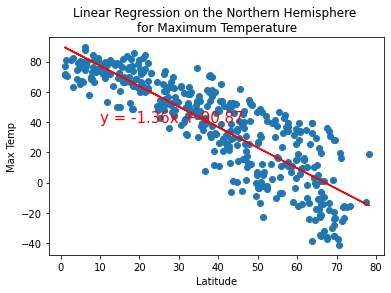

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

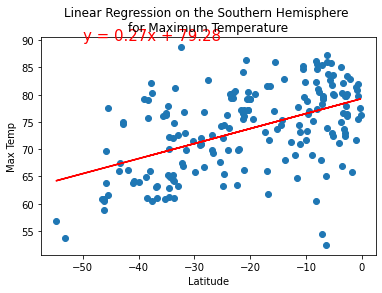

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

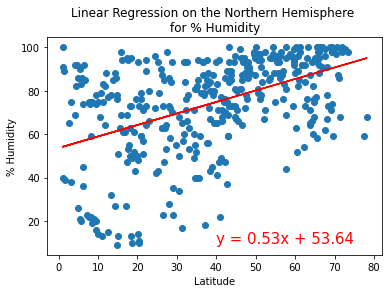

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

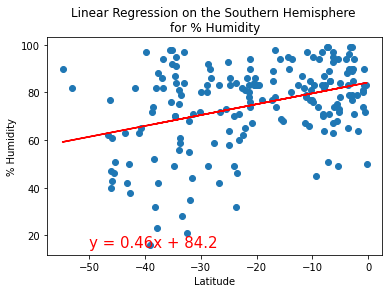

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

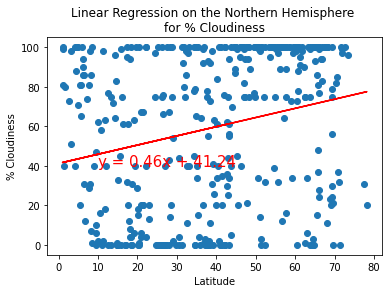

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(10,40))

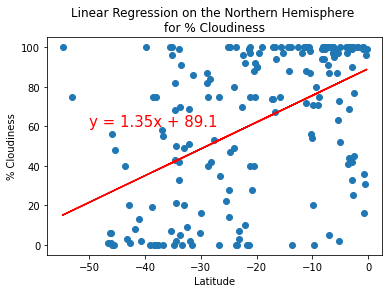

In [42]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,60))

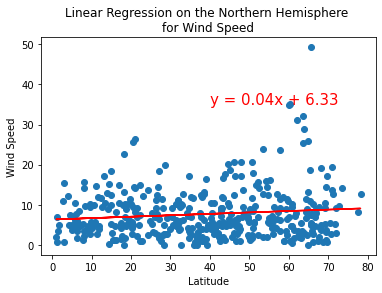

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

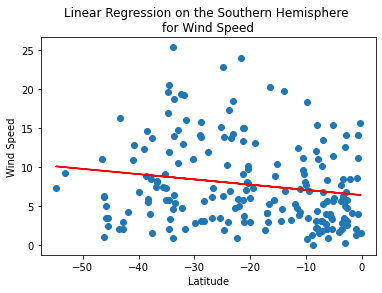

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))
